In [21]:
import sys
import os
from os.path import dirname, realpath, join
base_dir = dirname(dirname(os.getcwd()))
base_dir
import pandas as pd
from os.path import join
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import metrics

In [2]:
sys.path.insert(0, base_dir)
from config_path import PROSTATE_DATA_PATH, PLOTS_PATH, PROSTATE_LOG_PATH

In [14]:
def plot_roc(ax, y_test, y_pred_score, save_dir,color, label=''):
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_score, pos_label=1)
    roc_auc = metrics.auc(fpr, tpr)
    # plt.figure(fig.number)
#     plt.plot(fpr, tpr, label=label + ' (area = %0.2f)' % roc_auc, linewidth=2, color=color)
#     plt.plot(fpr, tpr, label=label + ' (area = %0.2f)' % roc_auc, linewidth=2)
    ax.plot(fpr, tpr, label=label + ' (area = %0.2f)' % roc_auc, linewidth=2, color=color)
    # plt.plot(fpr, tpr)
    ax.plot([0, 1], [0, 1], 'k--', alpha=0.1)
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])

    ax.set_xlabel('False Positive Rate', fontproperties)
    ax.set_ylabel('True Positive Rate', fontproperties)

In [9]:

pnet_base_dir = join(PROSTATE_LOG_PATH , 'pnet/onsplit_average_reg_10_tanh_large_testing')
df_pnet = pd.read_csv(join(pnet_base_dir, 'P-net_ALL_testing.csv'), sep=',', index_col=0, header=[0])

In [10]:
models_base_dir = join(PROSTATE_LOG_PATH , 'dense/onsplit_dense')
df_dense = pd.read_csv(join(models_base_dir, 'P-net_ALL_testing.csv'), sep=',', index_col=0, header=[0])


In [11]:
df_dense.head()

,pred,pred_scores,y
01-087MM_BONE,1.0,0.457993,1
01-095N1_LN,0.0,0.214757,1
08-093J1_LN,1.0,0.500848,1
10362,0.0,0.225192,0
AAPC-IP_LG-069-Tumor-SM-3NC72,0.0,0.207921,0


In [12]:
df_pnet.head()

,pred,pred_scores,y
01-087MM_BONE,1.0,0.946647,1
01-095N1_LN,0.0,0.127979,1
08-093J1_LN,1.0,0.990789,1
10362,1.0,0.475796,0
AAPC-IP_LG-069-Tumor-SM-3NC72,0.0,0.114404,0


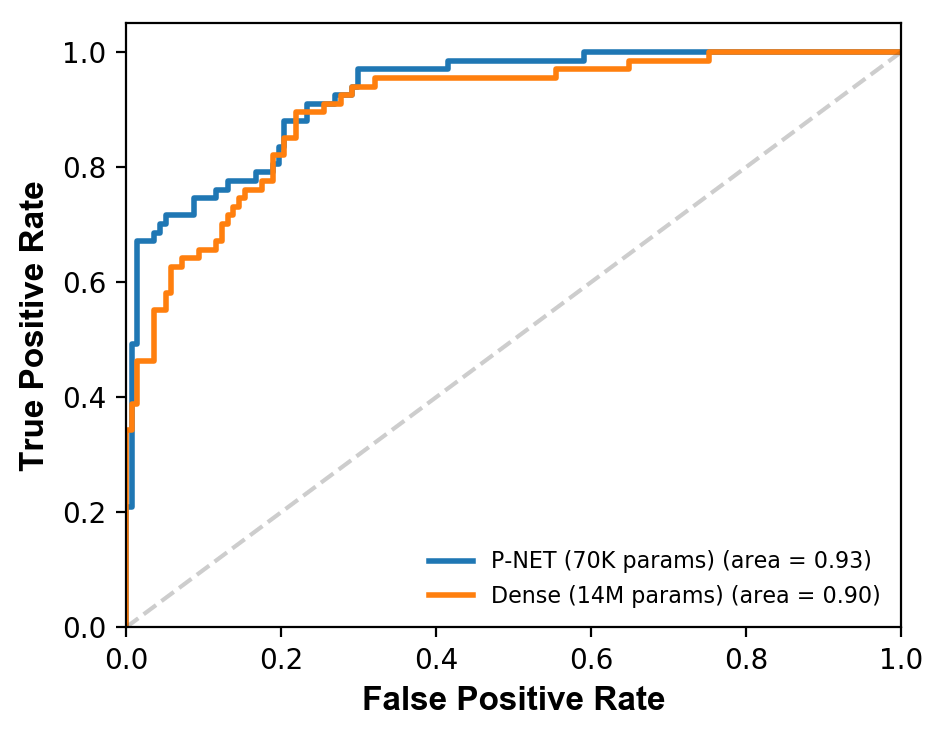

In [27]:
fig, ax = plt.subplots(nrows=1, ncols=1, sharey=True, figsize=(5,4), dpi=200)
fontproperties = {'family': 'Arial', 'weight': 'bold', 'size': 12}
y_test = df_pnet['y']
y_pred_score = df_pnet['pred_scores']
colors = sns.color_palette(None, 2)
plot_roc(ax, y_test, y_pred_score, None, color=colors[0], label='P-NET (70K params)')

y_test = df_dense['y']
y_pred_score = df_dense['pred_scores']
plot_roc(ax, y_test, y_pred_score, None, color=colors[1], label='Dense (14M params)')
plt.legend(loc="lower right", fontsize=8, framealpha=0.0)

plt.savefig('dense_same_arch')